In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_trend_hum_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [11]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('hum','casual','registered','cnt')
group_df = group_df.groupBy('hum').mean()
group_df = group_df.select('hum',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('hum').alias('Hum'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Hum,0.13,0.14,0,0.12,0.86,0.97,0.93,1,0.8,0.15,...,0.31,0.3,0.23,0.34,0.18,0.24,0.22,0.17,0.27,0.2
Average Casual,3.00,5.00,2.09,6.00,2.42,18.00,4.25,6.02,3.97,29.00,...,68.99,81.69,68.37,68.39,84.60,73.34,79.04,71.90,79.20,73.65
Average Registered,14.00,14.00,26.23,23.00,58.45,46.00,62.13,62.76,68.36,44.00,...,228.92,219.12,236.48,242.32,245.50,260.71,255.11,268.50,273.70,324.35
Average CNT,17.00,19.00,28.32,29.00,60.87,64.00,66.38,68.77,72.34,73.00,...,297.92,300.81,304.85,310.71,330.10,334.05,334.15,340.40,352.90,398.00


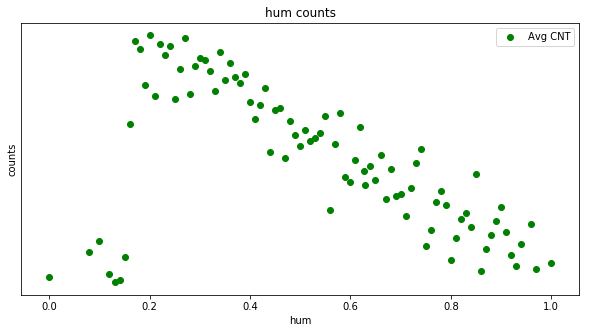

In [12]:
import matplotlib.pyplot as plt
import numpy as np

group_df = group_df.toPandas()

plt.scatter(group_df['Hum'], group_df['Average CNT'], color='g')
#plt.scatter(group_df['Hum'], group_df['Average Registered'], color='r')
#plt.scatter(group_df['Hum'], group_df['Average Casual'], color='b')

plt.yticks([]) #disable yticks
plt.legend(['Avg CNT'])
plt.xlabel('hum')
plt.ylabel('counts')
plt.title('hum counts')
plt.show()

In [4]:
plt.rcParams['figure.figsize'] = (10,5)